In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Final Exam Part B

## Part A - Model Training and Evaluation

### Exploratory Data Analysis

In [24]:
# Load the dataset
def load_data():
  base_dir = 'data'
  X_train = pd.read_csv(f'{base_dir}/x_train.csv')
  y_train = pd.read_csv(f'{base_dir}/y_train.csv')
  X_test = pd.read_csv(f'{base_dir}/x_test.csv')
  y_test = pd.read_csv(f'{base_dir}/y_test.csv')

  # Convert the target variable to 1-d array
  y_train = y_train.values.ravel()
  y_test = y_test.values.ravel()

  return X_train, y_train, X_test, y_test


# Visualize the first 20 images
def visualize_data(X_train):
  fig, axes = plt.subplots(2, 10, figsize=(20, 5))
  axes = axes.flatten()
  for i in range(20):
    axes[i].imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
  plt.show()

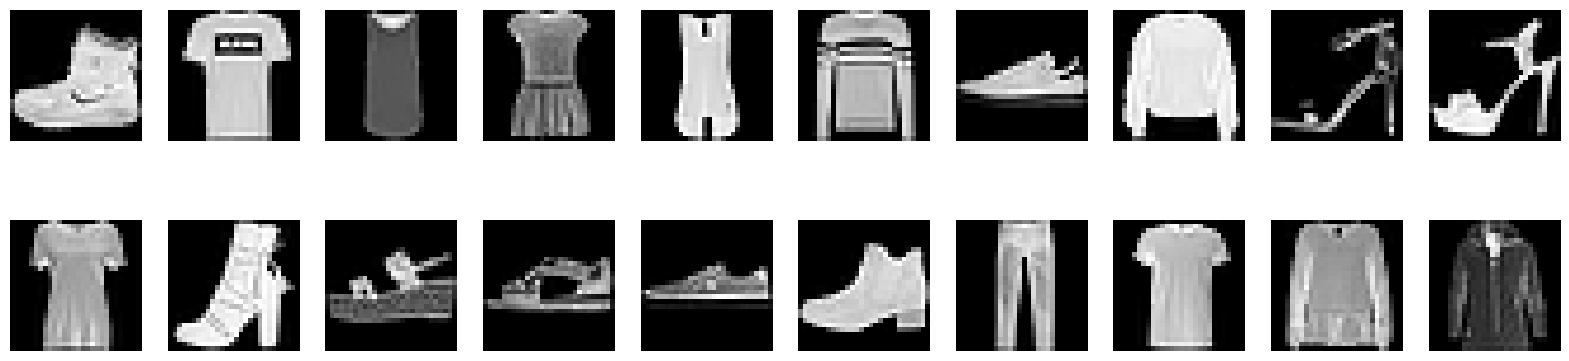

In [25]:
X_train, y_train, X_test, y_test = load_data()
visualize_data(X_train)

### Train a Baseline Model

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import joblib
import os

# Create a directory to save the models
os.makedirs('./models', exist_ok=True)


# Train a baseline decision tree model
def train_baseline_model(X, y):
  # Init a decision tree model
  model = DecisionTreeClassifier(random_state=42)

  # Use 5-fold cross validation to evaluate the model
  # FIXME 改回5fold
  scores = cross_validate(model, X, y, cv=2,
                          scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], n_jobs=-1)

  print('Baseline Decision Tree Model')
  print(f'Average Training Accuracy: {np.mean(scores["test_accuracy"]):.4f}')
  print(f'Average Training Precision: {np.mean(scores["test_precision_weighted"]):.4f}')
  print(f'Average Training Recall: {np.mean(scores["test_recall_weighted"]):.4f}')
  print(f'Average Training F1 Score: {np.mean(scores["test_f1_weighted"]):.4f}')

  model.fit(X, y)
  return model

In [ ]:
# Train the baseline model
# FIXME 改回 X_train, y_train
baseline_model = train_baseline_model(X_test, y_test)

# Dump the baseline model to a file
joblib.dump(baseline_model, './models/baseline_model.joblib')

### Train a Bagging Model

In [ ]:
from sklearn.ensemble import BaggingClassifier


def train_bagging_model(X, y, base_model):
  # Init a bagging classifier with the base model
  model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

  # Use 5-fold cross validation to evaluate the model
  # FIXME 改回5fold
  scores = cross_validate(model, X, y, cv=2,
                          scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], n_jobs=-1)

  print('\nBagging Model')
  print(f'Average Training Accuracy: {np.mean(scores["test_accuracy"]):.4f}')
  print(f'Average Training Precision: {np.mean(scores["test_precision_weighted"]):.4f}')
  print(f'Average Training Recall: {np.mean(scores["test_recall_weighted"]):.4f}')
  print(f'Average Training F1 Score: {np.mean(scores["test_f1_weighted"]):.4f}')

  model.fit(X, y)
  return model

In [ ]:
# Load the baseline model from the file
baseline_model = joblib.load('./models/baseline_model.joblib')

# Train the bagging model
# FIXME 改回 X_train, y_train
bagging_model = train_bagging_model(X_test, y_test, baseline_model)

# Dump the bagging model to a file
joblib.dump(bagging_model, './models/bagging_model.joblib')

### Train a Boosting Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


def train_boosting_model(X, y, base_model):
  # Init a boosting classifier with the base model
  model = AdaBoostClassifier(estimator=base_model, n_estimators=10, random_state=42, algorithm='SAMME')

  # Use 5-fold cross validation to evaluate the model
  # FIXME 改回5fold
  scores = cross_validate(model, X, y, cv=2,
                          scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], n_jobs=-1)

  print('\nBoosting Model')
  print(f'Average Training Accuracy: {np.mean(scores["test_accuracy"]):.4f}')
  print(f'Average Training Precision: {np.mean(scores["test_precision_weighted"]):.4f}')
  print(f'Average Training Recall: {np.mean(scores["test_recall_weighted"]):.4f}')
  print(f'Average Training F1 Score: {np.mean(scores["test_f1_weighted"]):.4f}')

  model.fit(X, y)
  return model

In [ ]:
# Load the baseline model from the file
baseline_model = joblib.load('./models/baseline_model.joblib')

# Train the boosting model
# FIXME 改回 X_train, y_train
boosting_model = train_boosting_model(X_test, y_test, baseline_model)

# Dump the boosting model to a file
joblib.dump(boosting_model, './models/boosting_model.joblib')

### Test and Compare the Models

In [ ]:
# Test the decision tree model
def test_decision_tree_model(model, X, y, model_name):
  y_pred = model.predict(X)
  print(f'{model_name} Testing Classification Report')
  print(classification_report(y, y_pred))

In [ ]:
# Test the baseline model
baseline_model = joblib.load('./models/baseline_model.joblib')
test_decision_tree_model(baseline_model, X_test, y_test, 'Baseline Model')

In [ ]:
# Test the bagging model
bagging_model = joblib.load('./models/bagging_model.joblib')
test_decision_tree_model(bagging_model, X_test, y_test, 'Bagging Model')

In [ ]:
# Test the boosting model
boosting_model = joblib.load('./models/boosting_model.joblib')
test_decision_tree_model(boosting_model, X_test, y_test, 'Boosting Model')

## Part B - Guessing the Mystery Label

### Train a MLP Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


def train_mlp_model(X, y):
  # Normalize the data with z-score
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Init a MLP model
  model = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=100, random_state=42)

  # Train the model
  model.fit(X_scaled, y)

  # Print the training accuracy
  print(f"MLP Training Accuracy: {model.score(X_scaled, y):.4f}")

  return model, scaler

In [ ]:
# Train the MLP model
# FIXME 改回 X_train, y_train
mlp_model, mlp_scaler = train_mlp_model(X_test, y_test)

# Dump the MLP model and the scaler to files
joblib.dump(mlp_model, './models/mlp_model.joblib')
joblib.dump(mlp_scaler, './models/mlp_scaler.joblib')

### Generate Embedding Matrix

In [ ]:
def get_hidden_layer_activations(model, X, layer_index):
  """Calculate the activations of a specified hidden layer.

  Parameters:
  - model: Trained instance of sklearn.neural_network.MLPClassifier.
  - X: Input data, numpy array of shape (n_samples, n_features).
  - layer_index: Index of the hidden layer for which to compute activations.

  Returns:
  - Activations of the specified hidden layer, numpy array of shape (n_samples, n_units_in_layer).
  """
  if layer_index < 0 or layer_index >= len(model.coefs_) - 1:
    raise ValueError("Invalid layer_index.")

  # Forward propagate through the network until the specified layer
  activations = X
  for i in range(layer_index + 1):
    activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
    if i < len(model.coefs_) - 1:
      activations = np.maximum(0, activations)

  return activations

In [ ]:
# Load the MLP model from the file
mlp_model = joblib.load('./models/mlp_model.joblib')

# Normalize the data with z-score
mlp_scaler = joblib.load('./models/mlp_scaler.joblib')
X_test_scaled = mlp_scaler.transform(X_test)

# Retrieve activations for the 3rd hidden layer
embeddings = get_hidden_layer_activations(mlp_model, X_test_scaled, 2)

print(f'Embeddings Shape: {embeddings.shape}')

### PCA & LDA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Reduce the dimensionality of the embeddings to 2D using PCA and LDA
def reduce_to_2d(embeddings, y_test):
  # PCA
  pca = PCA(n_components=2)
  pca_reduced = pca.fit_transform(embeddings)

  # LDA
  lda = LDA(n_components=2)
  lda_reduced = lda.fit_transform(embeddings, y_test)

  return pca_reduced, lda_reduced


# Plot 2D visualization
def plot_2d(pca_reduced, lda_reduced, y):
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))

  for label in np.unique(y):
    axes[0].scatter(pca_reduced[y == label, 0], pca_reduced[y == label, 1], label=f"Label {int(label)}", alpha=0.6)
    axes[1].scatter(lda_reduced[y == label, 0], lda_reduced[y == label, 1], label=f"Label {int(label)}", alpha=0.6)

  axes[0].set_title('PCA Visualization')
  axes[1].set_title('LDA Visualization')

  axes[0].legend()
  axes[1].legend()

  plt.show()

In [ ]:
# Reduce the dimensionality of the embeddings to 2D
embeddings_pca_reduced, embeddings_lda_reduced = reduce_to_2d(embeddings, y_test)

plot_2d(embeddings_pca_reduced, embeddings_lda_reduced, y_test)